# Support Vector Machines 

## [Fraud in Wine](https://en.wikipedia.org/wiki/Wine_fraud)

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../DATA/wine_fraud.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [4]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

In [5]:
df['type'].unique()

array(['red', 'white'], dtype=object)

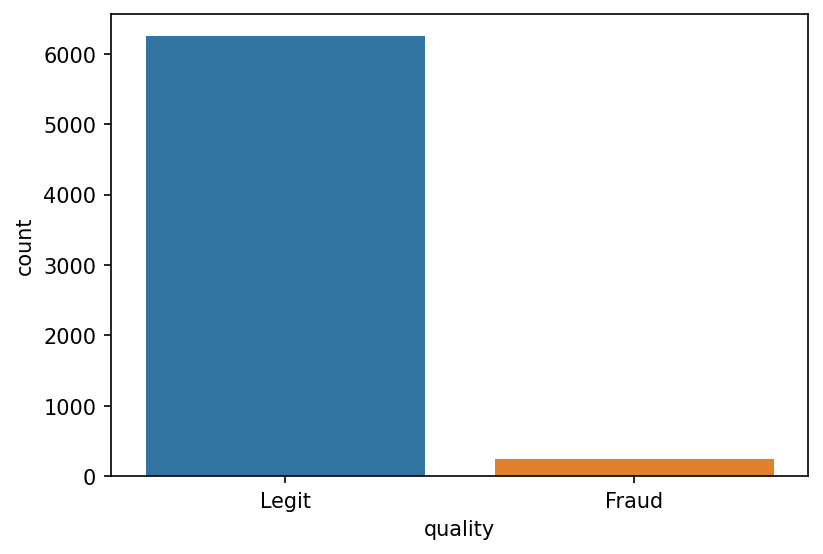

In [13]:
plt.figure(figsize=(6,4),dpi=150)
sns.countplot(df,x='quality',hue='quality')
plt.show()

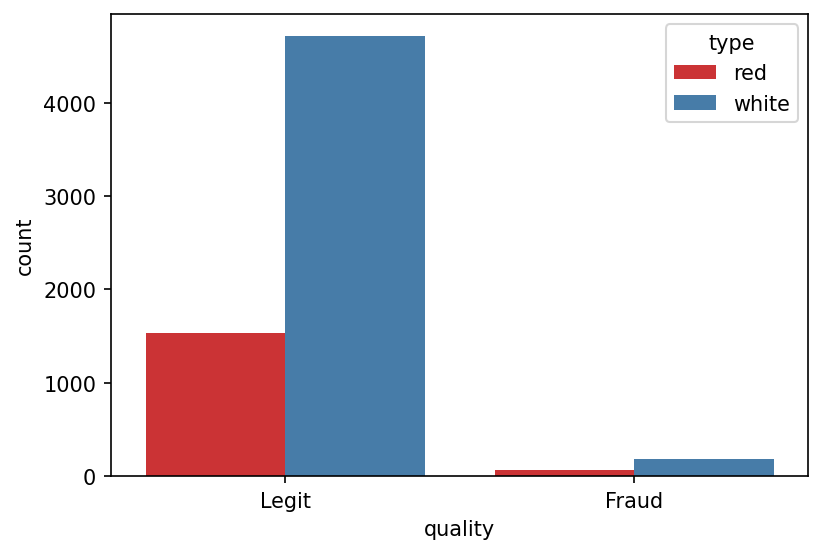

In [15]:
plt.figure(figsize=(6,4),dpi=150)
sns.countplot(df,x='quality',hue='type',palette='Set1')
plt.show()

In [21]:
df[df['quality'] == 'Fraud']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
18,7.4,0.590,0.08,4.40,0.086,6.0,29.0,0.99740,3.38,0.50,9.0,Fraud,red
38,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,Fraud,red
41,8.8,0.610,0.30,2.80,0.088,17.0,46.0,0.99760,3.26,0.51,9.3,Fraud,red
45,4.6,0.520,0.15,2.10,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,Fraud,red
73,8.3,0.675,0.26,2.10,0.084,11.0,43.0,0.99760,3.31,0.53,9.2,Fraud,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373,7.1,0.240,0.34,1.20,0.045,6.0,132.0,0.99132,3.16,0.46,11.2,Fraud,white
6378,6.0,0.590,0.00,0.80,0.037,30.0,95.0,0.99032,3.10,0.40,10.9,Fraud,white
6403,6.0,0.350,0.46,0.90,0.033,9.0,65.0,0.98934,3.24,0.35,12.1,Fraud,white
6438,5.2,0.405,0.15,1.45,0.038,10.0,44.0,0.99125,3.52,0.40,11.6,Fraud,white


In [26]:
# White wines = 1
# red wines = 0

df['type'] = pd.get_dummies(df['type'],drop_first=True,dtype=int)

In [27]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0


In [60]:
df_corr = df.drop('quality',axis=1).sort_values('type',ascending=True).corr()['type']


In [61]:
df_corr.sort_values()

volatile acidity       -0.653036
chlorides              -0.512678
sulphates              -0.487218
fixed acidity          -0.486740
density                -0.390645
pH                     -0.329129
alcohol                 0.032970
citric acid             0.187397
residual sugar          0.348821
free sulfur dioxide     0.471644
total sulfur dioxide    0.700357
type                    1.000000
Name: type, dtype: float64

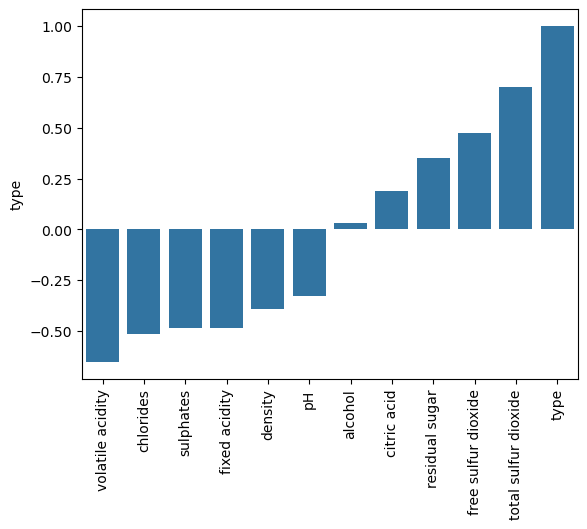

In [62]:
sns.barplot(df_corr.sort_values())
plt.xticks(rotation = 90);

<Axes: >

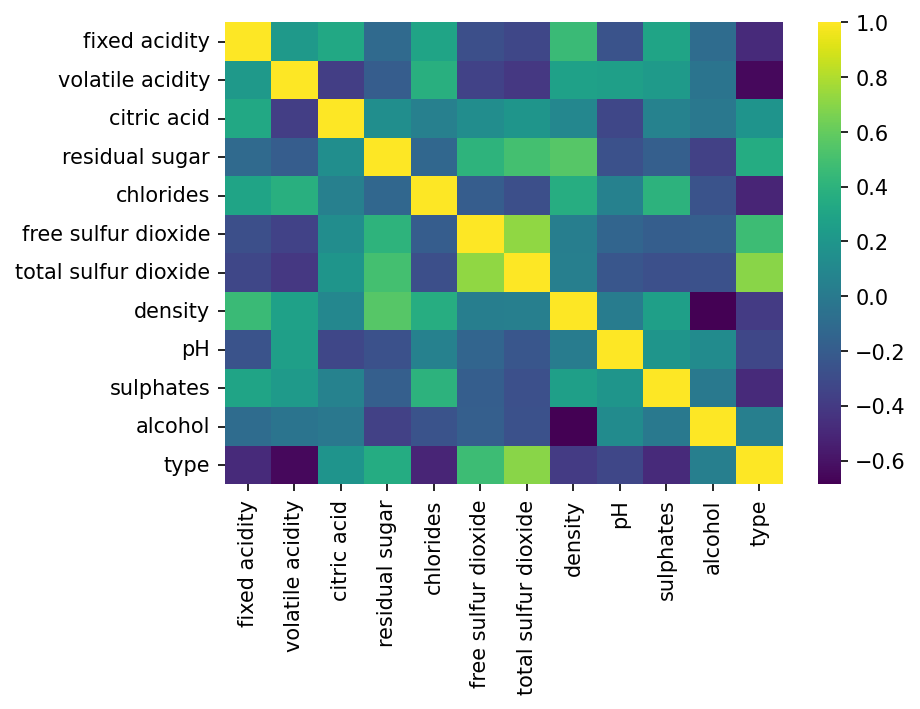

In [66]:
plt.figure(figsize=(6,4),dpi=150)
sns.heatmap(df.drop('quality',axis=1).corr(),cmap='viridis')

<Figure size 2000x1600 with 0 Axes>

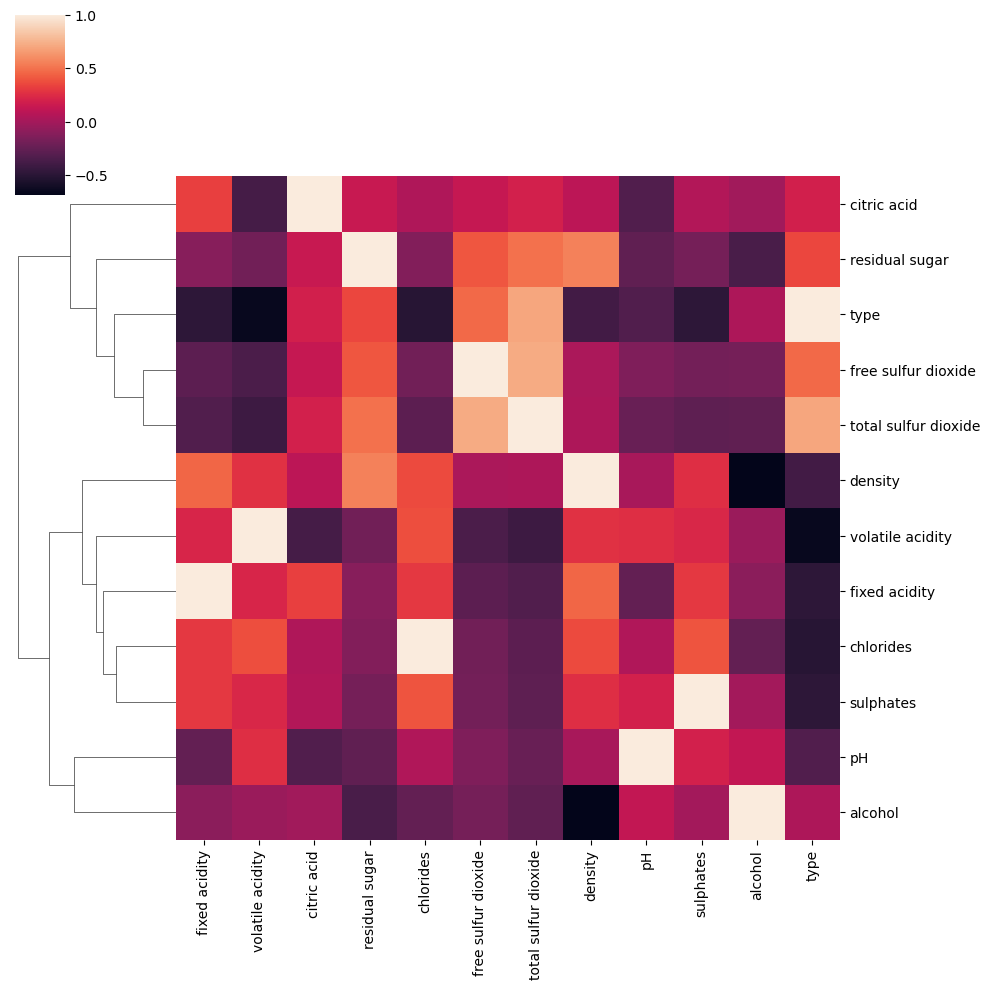

In [78]:
plt.figure(figsize=(10,8),dpi=200)
sns.clustermap(df.drop('quality',axis=1).corr(),col_cluster=False);

In [81]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,0


In [82]:
# Model Training on Support Vector Classifier

In [83]:
X = df.drop('quality',axis=1)

In [84]:
y = df['quality']

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [88]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scaler = StandardScaler()

In [95]:
X_train = scaler.fit_transform(X_train)

In [96]:
X_valid = scaler.transform(X_valid)

In [97]:
from sklearn.svm import SVC

In [147]:
svm_model = SVC(random_state=42,class_weight='balanced',kernel='poly',degree=4)

In [148]:
svm_model.fit(X_train,y_train)

SVC(class_weight='balanced', degree=4, kernel='poly', random_state=42)

In [149]:
y_pred = svm_model.predict(X_valid)

In [185]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [151]:
confusion_matrix(y_valid,y_pred)

array([[ 15,  10],
       [ 49, 413]], dtype=int64)

In [152]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

       Fraud       0.23      0.60      0.34        25
       Legit       0.98      0.89      0.93       462

    accuracy                           0.88       487
   macro avg       0.61      0.75      0.64       487
weighted avg       0.94      0.88      0.90       487



In [155]:
X_test = scaler.transform(X_test)

In [156]:
final_pred = svm_model.predict(X_test)

In [157]:
confusion_matrix(y_test,final_pred)

array([[  3,  13],
       [ 39, 433]], dtype=int64)

In [158]:
print(classification_report(y_test,final_pred))

              precision    recall  f1-score   support

       Fraud       0.07      0.19      0.10        16
       Legit       0.97      0.92      0.94       472

    accuracy                           0.89       488
   macro avg       0.52      0.55      0.52       488
weighted avg       0.94      0.89      0.92       488



In [187]:
accuracy_score(y_test,final_pred)

0.8934426229508197